<a href="https://colab.research.google.com/github/SutapaSusovita/CodeAlpha_Emotion-Recognition-from-speech/blob/main/Speech_Emotion_Recoginiton_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uwrfkaggler_ravdess_emotional_speech_audio_path = kagglehub.dataset_download('uwrfkaggler/ravdess-emotional-speech-audio')
ejlok1_toronto_emotional_speech_set_tess_path = kagglehub.dataset_download('ejlok1/toronto-emotional-speech-set-tess')
ejlok1_cremad_path = kagglehub.dataset_download('ejlok1/cremad')
ejlok1_surrey_audiovisual_expressed_emotion_savee_path = kagglehub.dataset_download('ejlok1/surrey-audiovisual-expressed-emotion-savee')
mostafaabdlhamed_speech_signal_features_path = kagglehub.dataset_download('mostafaabdlhamed/speech-signal-features')

print('Data source import complete.')


Data source import complete.


# import libraries


In [2]:
# this notebook
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import audio access libraries
import librosa
import librosa.display
import IPython.display as ipd
import os
import warnings

warnings.filterwarnings('ignore')

#  datasets path


In [3]:
ravdess_path = '/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/'
speech_signal_path = '/kaggle/input/speech-signal-features/'
cremad_path = '/kaggle/input/cremad/AudioWAV/'
savee_path = '/kaggle/input/surrey-audiovisual-expressed-emotion-savee/ALL/'
toronto_path = '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/'

# ravdess preprocessing

In [4]:
ravdess_ls = os.listdir(ravdess_path)
ravdess_ls

['Actor_02',
 'Actor_17',
 'Actor_05',
 'Actor_16',
 'Actor_21',
 'Actor_01',
 'Actor_11',
 'Actor_20',
 'Actor_08',
 'Actor_15',
 'Actor_06',
 'Actor_12',
 'Actor_23',
 'Actor_24',
 'Actor_22',
 'Actor_04',
 'Actor_19',
 'Actor_10',
 'Actor_09',
 'Actor_14',
 'Actor_03',
 'Actor_13',
 'Actor_18',
 'Actor_07']

In [5]:
file_emotion = []
file_path = []
c = 0
for i in ravdess_ls:
    # as their are 24 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess_path  + i)
    for f in actor:
        part = f.split('.')[0].split('-')
# third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess_path + i + '/' + f)


In [6]:
emotions = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
paths = pd.DataFrame(file_path, columns=['Path'])
ravdess_df = pd.concat([paths, emotions], axis=1)
# changing integers to actual emotions.
ravdess_df.Emotions.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust',
                             8:'surprise'},
                            inplace=True)

ravdess_df.head()

,Path,Emotions
0,/kaggle/input/ravdess-emotional-speech-audio/a...,surprise
1,/kaggle/input/ravdess-emotional-speech-audio/a...,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/a...,disgust
3,/kaggle/input/ravdess-emotional-speech-audio/a...,disgust
4,/kaggle/input/ravdess-emotional-speech-audio/a...,neutral


# cremad processing

In [7]:
crema_ls = os.listdir(cremad_path)

file_emotion = []
file_path = []

for file in crema_ls:
    # storing file paths
    file_path.append(cremad_path+ file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
cremad_df = pd.concat([path_df, emotion_df], axis=1)
cremad_df.head()

,Path,Emotions
0,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav,disgust
1,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav,happy
2,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav,happy
3,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav,disgust
4,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav,disgust


# Toronto processing

In [8]:
tess_ls = os.listdir(toronto_path)

file_emotion = []
file_path = []

for dir in tess_ls:
    directories = os.listdir(toronto_path + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(toronto_path + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
tess_df = pd.concat([path_df, emotion_df], axis=1)
tess_df.head()



,Path,Emotions
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


# save processing

In [9]:
savee_ls = os.listdir(savee_path)

file_emotion = []
file_path = []

for file in savee_ls:
    file_path.append(savee_path+ file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
savee_df = pd.concat([ path_df,emotion_df], axis=1)
savee_df.head()



,Path,Emotions
0,/kaggle/input/surrey-audiovisual-expressed-emo...,happy
1,/kaggle/input/surrey-audiovisual-expressed-emo...,fear
2,/kaggle/input/surrey-audiovisual-expressed-emo...,happy
3,/kaggle/input/surrey-audiovisual-expressed-emo...,disgust
4,/kaggle/input/surrey-audiovisual-expressed-emo...,angry


In [10]:
# creating Dataframe using all the 4 dataframes we created so far.
concate = pd.concat([ravdess_df, cremad_df, tess_df, savee_df], axis = 0)
concate.to_csv("data_path.csv",index=False)
concate.head()

,Path,Emotions
0,/kaggle/input/ravdess-emotional-speech-audio/a...,surprise
1,/kaggle/input/ravdess-emotional-speech-audio/a...,neutral
2,/kaggle/input/ravdess-emotional-speech-audio/a...,disgust
3,/kaggle/input/ravdess-emotional-speech-audio/a...,disgust
4,/kaggle/input/ravdess-emotional-speech-audio/a...,neutral


In [11]:
print(concate.Emotions.value_counts())

Emotions
disgust     1923
sad         1923
fear        1923
happy       1923
angry       1923
neutral     1895
surprise     652
Name: count, dtype: int64


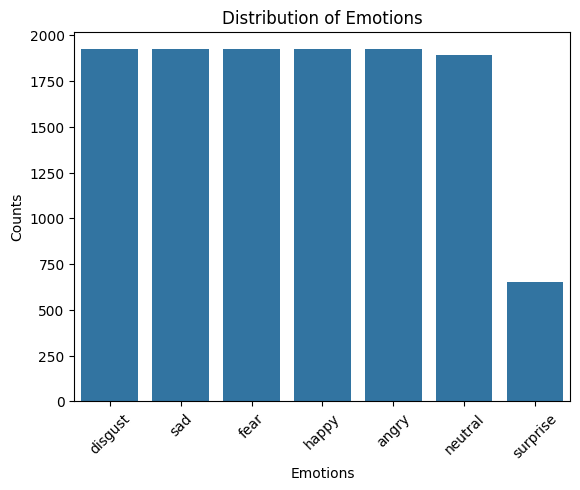

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts
emotion_counts = concate.Emotions.value_counts()

# Create a bar plot
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
# Add labels and title
plt.xlabel('Emotions')
plt.ylabel('Counts')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


In [13]:
# Instead of using file_path[0], use concate['Path'].values[0]
file_path = concate['Path'].values[0]
label = concate['Emotions'].values[0]
# Then load
data, sr = librosa.load(file_path)
print(sr)
print(label)



22050
surprise


In [14]:
ipd.Audio(data,rate=sr)


# create spectrogram

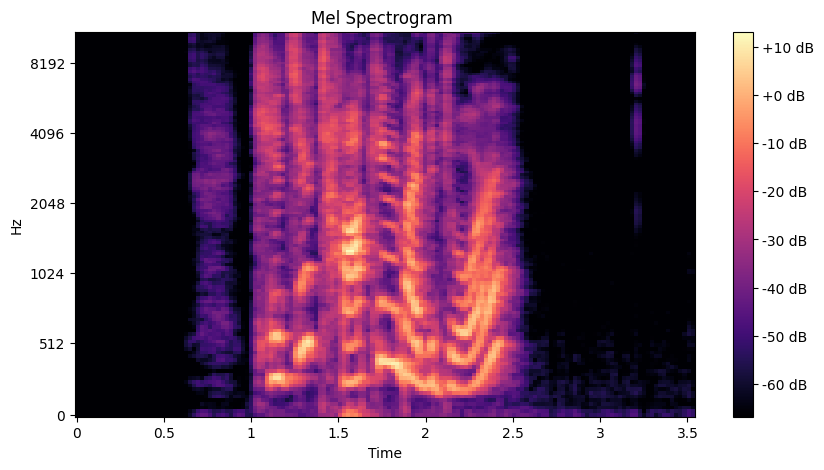

In [15]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000)
log_spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, y_axis='mel', sr=sr, x_axis='time');
plt.title('Mel Spectrogram ')
plt.colorbar(format='%+2.0f dB')

# create MFCC

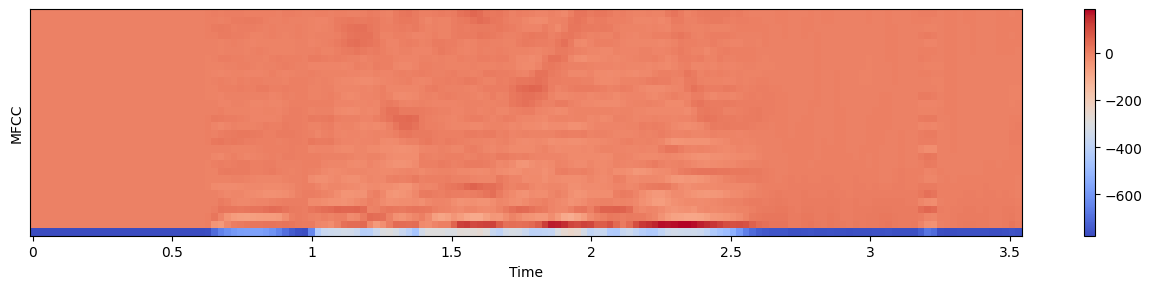

In [16]:
mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=30)

# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()


# Augmentation

In [17]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

# STRETCH
def stretch(data, rate=0.8):
    return librosa.resample(data, orig_sr=sr, target_sr=int(sr * rate))

# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(y=data, sr=sampling_rate, n_steps=pitch_factor)


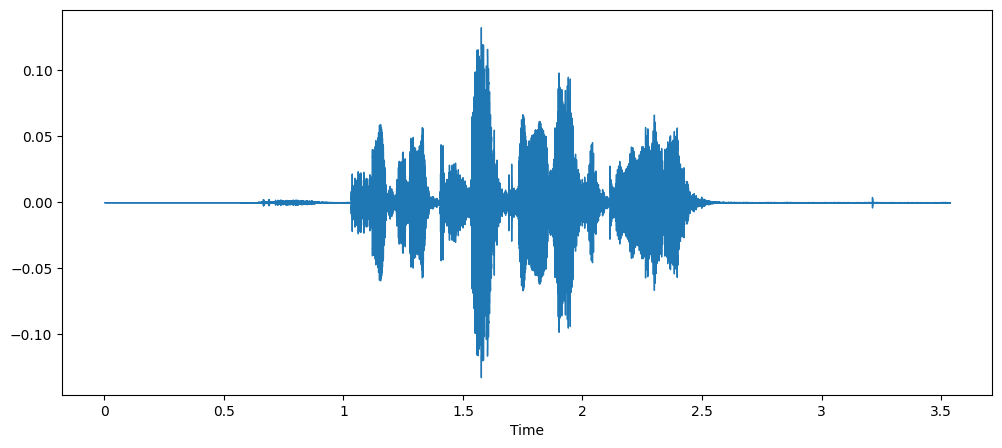

In [18]:
# NORMAL AUDIO
import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sr)
ipd.Audio(data,rate=sr)

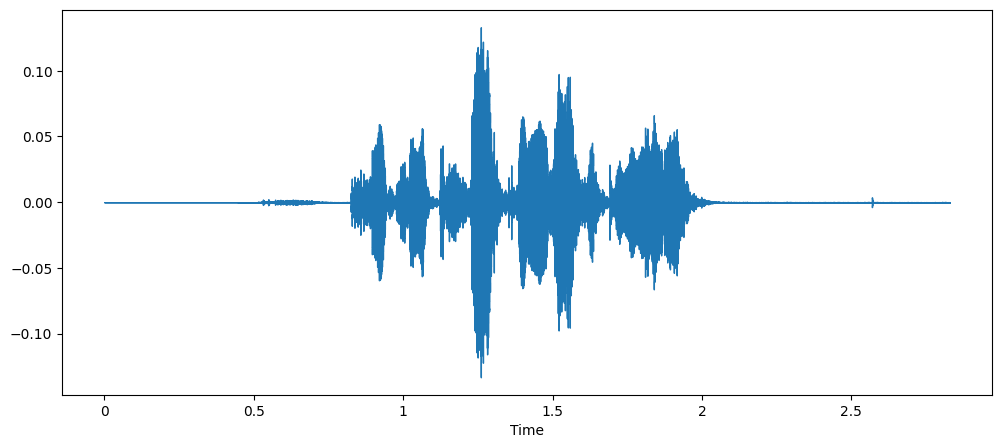

In [19]:
# AUDIO WITH NOISE
x = stretch(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sr)
ipd.Audio(x, rate=sr)

# feature extraction

In [20]:
def zcr(data, frame_length, hop_length):
    zcr = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr)

def rmse(data, frame_length=2048, hop_length=512):
    rmse = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten: bool = True):
    mfcc = librosa.feature.mfcc(y=data, sr=sr)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_features(path,duration=2.5, offset=0.6):
    data,sr=librosa.load(path,duration=duration,offset=offset)
    aud=extract_features(data)
    audio=np.array(aud)

    noised_audio=noise(data)
    aud2=extract_features(noised_audio)
    audio=np.vstack((audio,aud2))

    pitched_audio=pitch(data,sr)
    aud3=extract_features(pitched_audio)
    audio=np.vstack((audio,aud3))

    pitched_audio1=pitch(data,sr)
    pitched_noised_audio=noise(pitched_audio1)
    aud4=extract_features(pitched_noised_audio)
    audio=np.vstack((audio,aud4))

    return audio


### apply extracted features to labels

In [21]:
from joblib import Parallel, delayed
import timeit
start = timeit.default_timer()
# Define a function to get features for a single audio file
def process_feature(path, emotion):
    features = get_features(path)
    X = []
    Y = []
    for ele in features:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)
    return X, Y

paths = concate.Path
emotions = concate.Emotions

# Run the loop in parallel
results = Parallel(n_jobs=-1)(delayed(process_feature)(path, emotion) for (path, emotion) in zip(paths, emotions))

# Collect the results
X = []
Y = []
for result in results:
    x, y = result
    X.extend(x)
    Y.extend(y)


stop = timeit.default_timer()

print('Time: ', stop - start)

Time:  643.122633497


In [22]:
len(X)

48648

In [23]:
len(Y)

48648

In [24]:
concate['Path'].shape   ## so augmentation is shape[0]*4 = 48648

(12162,)

# Saving Features

In [25]:
features = pd.DataFrame(X)
features['Emotion'] = Y
features.to_csv('emotions_features.csv', index=False)
features.head()

,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,Emotion
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.247070,0.376953,0.498535,0.507324,0.498047,0.495605,0.499023,0.479004,0.486816,0.477539,...,-4.430654,4.010950,1.555025,-5.682500,-2.790372,-1.286489,0.149653,0.448271,6.181750,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518304,0.838670,1.308735,1.855114,2.405193,2.896440,3.283494,3.541683,3.667480,surprise
3,0.261230,0.378906,0.499023,0.483398,0.457520,0.449707,0.426270,0.413574,0.405273,0.402344,...,-1.715583,-2.967681,0.170685,-2.528159,-3.339423,-2.055702,-1.531597,0.642177,2.517044,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


In [29]:
emo_df.to_csv('emotions_features.csv', index=False)
emo_df = pd.read_csv('emotions_features.csv')
emo_df.head()


,0,1,2,3,4,5,6,7,8,9,...,2367,2368,2369,2370,2371,2372,2373,2374,2375,emotion
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303,surprise
1,0.247070,0.376953,0.498535,0.507324,0.498047,0.495605,0.499023,0.479004,0.486816,0.477539,...,-4.430654,4.010950,1.555025,-5.682500,-2.790372,-1.286489,0.149653,0.448271,6.181750,surprise
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.518304,0.838670,1.308735,1.855114,2.405193,2.896440,3.283494,3.541683,3.667480,surprise
3,0.261230,0.378906,0.499023,0.483398,0.457520,0.449707,0.426270,0.413574,0.405273,0.402344,...,-1.715583,-2.967681,0.170685,-2.528159,-3.339423,-2.055702,-1.531597,0.642177,2.517044,surprise
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744,neutral


In [30]:
print(emo_df.isna().sum())

0              0
1              0
2              0
3              0
4              0
           ...  
2372       37624
2373       37624
2374       37624
2375       37624
emotion        0
Length: 2377, dtype: int64


In [31]:
emo_df = emo_df.fillna(0)
emo_df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
2372,0
2373,0
2374,0
2375,0


In [32]:
emo_df.shape

(48648, 2377)

# Data Preprocessing

In [34]:
X = emo_df.drop(columns=['emotion'])
Y = emo_df['emotion']


In [35]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375
0,0.343750,0.479492,0.573730,0.458008,0.375488,0.301758,0.269043,0.255371,0.251465,0.251953,...,-0.948768,-1.517690,-1.716483,-1.599310,-1.234609,-0.693198,-0.038982,0.675206,1.405603,2.112303
1,0.247070,0.376953,0.498535,0.507324,0.498047,0.495605,0.499023,0.479004,0.486816,0.477539,...,-4.072093,-4.430654,4.010950,1.555025,-5.682500,-2.790372,-1.286489,0.149653,0.448271,6.181750
2,0.304199,0.427246,0.540039,0.471191,0.387207,0.333008,0.282227,0.259277,0.258789,0.252930,...,0.411232,0.518304,0.838670,1.308735,1.855114,2.405193,2.896440,3.283494,3.541683,3.667480
3,0.261230,0.378906,0.499023,0.483398,0.457520,0.449707,0.426270,0.413574,0.405273,0.402344,...,2.809495,-1.715583,-2.967681,0.170685,-2.528159,-3.339423,-2.055702,-1.531597,0.642177,2.517044
4,0.437500,0.659668,0.862305,0.878906,0.865234,0.847168,0.845703,0.827637,0.835938,0.667969,...,2.005284,2.586417,2.746852,2.223276,0.986916,-0.730695,-2.530884,-4.002834,-4.849372,-4.929744


In [36]:
Y.head()

,emotion
0,surprise
1,surprise
2,surprise
3,surprise
4,neutral


In [37]:
# Encodeing label
from sklearn.preprocessing import OneHotEncoder
en = OneHotEncoder()
Y = en.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [38]:
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
Y.shape

(48648, 7)

In [40]:
# splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state = 42 , test_size = 0.2 , shuffle = True)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_train.shape)

(38918, 2376)
(38918, 7)
(9730, 2376)
(38918, 7)


In [42]:
# scaling for consistency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
x_train.shape

(38918, 2376)

In [44]:
import keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [45]:
# callbacks
#1. early stopping
early_stopping = EarlyStopping(monitor='val_accuracy',mode='max',patience=5,restore_best_weights=True)
#2. ReduceLROnPlateau
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.00001)
#3. ModelCheckpoint
model_checkpoint = ModelCheckpoint('best_model1_weights.keras', monitor='val_accuracy', save_best_only=True)

In [46]:
# prepare data for conv1d
x_train_cnn = np.expand_dims(x_train, axis=2)
x_test_cnn = np.expand_dims(x_test, axis=2)

In [47]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(512,kernel_size=5, strides=1,padding='same', activation='relu',input_shape=(x_train_cnn.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(512,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the second max pooling layer

    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),

    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fourth max pooling layer

    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2),  # Add dropout layer after the fifth max pooling layer

    L.Flatten(),
    L.Dense(512,activation='relu'),
    L.BatchNormalization(),
    L.Dense(7,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2376, 512)      │         3,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 2376, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1188, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 1188, 512)      │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 1188, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 594, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 594, 256)       │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 594, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 297, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 297, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 297, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 149, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 149, 128)       │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 149, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 75, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,915,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,59

 Total params: 7,193,223 (27.44 MB)

 Trainable params: 7,188,871 (27.42 MB)

 Non-trainable params: 4,352 (17.00 KB)

In [49]:
history=model.fit(x_train_cnn, y_train, epochs=10, validation_data=(x_test_cnn, y_test), batch_size=64,callbacks=[early_stopping,lr_reduction,model_checkpoint])

Epoch 1/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 160s 263ms/step - accuracy: 0.4042 - loss: 1.6308 - val_accuracy: 0.4502 - val_loss: 1.4474 - learning_rate: 0.0010
Epoch 2/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 186s 236ms/step - accuracy: 0.5553 - loss: 1.1519 - val_accuracy: 0.5409 - val_loss: 1.2128 - learning_rate: 0.0010
Epoch 3/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 143s 235ms/step - accuracy: 0.6149 - loss: 1.0008 - val_accuracy: 0.5835 - val_loss: 1.0663 - learning_rate: 0.0010
Epoch 4/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 200s 232ms/step - accuracy: 0.6575 - loss: 0.9000 - val_accuracy: 0.6453 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 5/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 140s 230ms/step - accuracy: 0.7150 - loss: 0.7691 - val_accuracy: 0.5761 - val_loss: 1.1766 - learning_rate: 0.0010
Epoch 6/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 140s 230ms/step - accuracy: 0.7200 - loss: 0.7459 - val_accuracy: 0.7243 - val_loss: 0.7328 - learning_rate: 0.0010
Epoch 7/10
609/609 ━━━━━━━━━━━━━━━━━━━━ 142s 230ms/step - accura

In [50]:
model.save_weights("cnn_model.weights.h5")

# Evaluation

In [51]:
print('model evaluation accuracy: ',model.evaluate(x_test_cnn , y_test))

305/305 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.8636 - loss: 0.3903
model evaluation accuracy:  [0.38805603981018066, 0.8638232350349426]


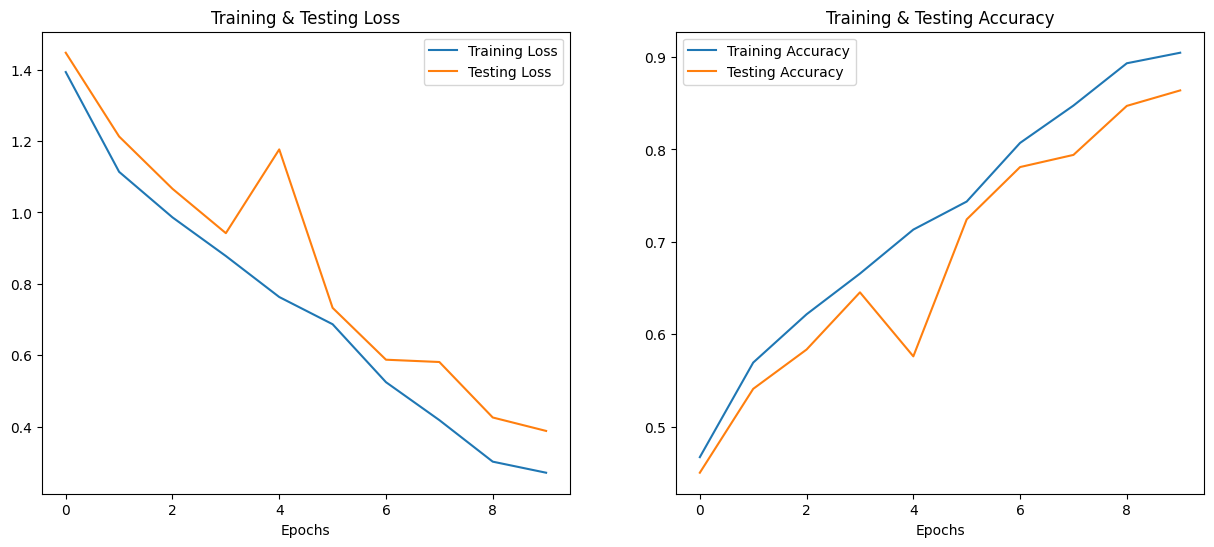

In [53]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(15,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [54]:
# inference on test data:
pred = model.predict(x_test_cnn)
y_pred = en.inverse_transform(pred)
y_true = en.inverse_transform(y_test)

df_results = pd.DataFrame({
    'True Label': y_true.flatten(),
    'Predicted Label': y_pred.flatten()
})

df_results.head(15)


305/305 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step


,True Label,Predicted Label
0,angry,surprise
1,angry,angry
2,disgust,disgust
3,happy,happy
4,fear,neutral
5,happy,happy
6,happy,happy
7,fear,fear
8,fear,happy
9,surprise,surprise


In [55]:
model.save("cnn_model_full.keras")  # saves architecture + weights + optimizer state

In [56]:
import joblib
joblib.dump(scaler, 'emotion_scaler.pkl') #save scaler
joblib.dump(en, 'emotion_encoder.pkl')    #save encoder

['emotion_encoder.pkl']

# Inference

In [57]:
from tensorflow.keras.models import load_model

model = load_model("cnn_model_full.keras")
print('Done')

Done


In [58]:
import numpy as np
import librosa
import joblib
from tensorflow import keras

# Load all required components
MODEL = keras.models.load_model("cnn_model_full.keras")
SCALER = joblib.load('emotion_scaler.pkl')
ENCODER = joblib.load('emotion_encoder.pkl')

def zcr(data, frame_length, hop_length):
    zcr_feature = librosa.feature.zero_crossing_rate(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(zcr_feature)

def rmse(data, frame_length=2048, hop_length=512):
    rmse_feature = librosa.feature.rms(y=data, frame_length=frame_length, hop_length=hop_length)
    return np.squeeze(rmse_feature)

def mfcc(data, sr, frame_length=2048, hop_length=512, flatten=True):
    mfcc_feature = librosa.feature.mfcc(y=data, sr=sr, n_fft=frame_length, hop_length=hop_length)
    return np.squeeze(mfcc_feature.T) if not flatten else np.ravel(mfcc_feature.T)


def extract_features(data,sr=22050,frame_length=2048,hop_length=512):
    result=np.array([])

    result=np.hstack((result,
                      zcr(data,frame_length,hop_length),
                      rmse(data,frame_length,hop_length),
                      mfcc(data,sr,frame_length,hop_length)
                     ))
    return result

def get_predict_feat(path):
    d, s_rate = librosa.load(path, duration=2.5, offset=0.6)
    res = extract_features(d)

    desired_length = 2376
    current_length = len(res)

    if current_length > desired_length:
        # Truncate
        res = res[:desired_length]
    elif current_length < desired_length:
        # Pad with zeros
        res = np.pad(res, (0, desired_length - current_length), 'constant')

    result = np.reshape(res, (1, desired_length))
    i_result = SCALER.transform(result)
    final_result = np.expand_dims(i_result, axis=2)

    return final_result


    return final_result

def prediction(path1):
    res=get_predict_feat(path1)
    predictions=MODEL.predict(res)
    y_pred = ENCODER.inverse_transform(predictions)
    print(y_pred[0][0])

In [59]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
neutral


In [60]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-01-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
neutral


In [61]:
prediction("/kaggle/input/ravdess-emotional-speech-audio/Actor_01/03-01-05-01-02-02-01.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
angry
